# MA124 Maths by Computer: Assignment 3 
## Part A: Monte Carlo Integration

Student number: 2103654

In [1]:
# import libraries

import numpy as np
import matplotlib.pyplot as plt

We consider the integral

$$
\int_a^b f(x) \, dx
$$

where $f(x) = -\sin(x)/x$, $a=\pi$ and $b = 4\pi$. Since $\sin(x)/x$ does not have an elementary antiderivative we must use numerical methods to evaluate this integral.

### Approach 1: Using Monte Carlo to estimate $\bar f$, the mean value of $f$ over the interval $[\pi,4\pi]$

---

We generate a random sample of points $x$ from the uniform distribution on $[\pi,4\pi]$, evaluate $f(x)$ at each of these points and compute the mean. This gives our approximation to $\bar f$. Multiplying by $(b-a)$, i.e. $3\pi$, then gives the approximation to $\displaystyle{\int_\pi^{4\pi} -\sin(x)/x dx}$. 

The mean of f in the interval is 0.03796225060799157
the Monte Carlo estimate for the integral is 0.3577857828714029


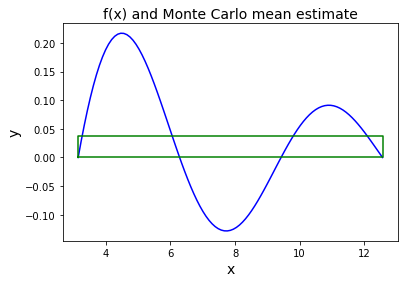

In [2]:
# define the function to integrate
def my_fun(x):
    return -np.sin(x)/x

# set the interval [a,b] and the number of samples
a, b = np.pi, 4*np.pi
N = 10**6

# generate the samples and evaluate f at each 
x = np.random.uniform(a, b, N)
f_of_x = my_fun(x)

# compute the mean and estimate the integral
f_mean = np.mean(f_of_x)
print("The mean of f in the interval is", f_mean)
my_integral = (b-a) * f_mean
print("the Monte Carlo estimate for the integral is", my_integral)

# plotting
x_plot = np.linspace(a, b, 101)
y_plot = my_fun(x_plot)
plt.plot(x_plot ,y_plot, 'b')
plt.plot([a,b,b,a,a],[0,0,f_mean, f_mean,0], 'g')

plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.title("f(x) and Monte Carlo mean estimate", fontsize=14)

plt.show()

### Approach 2: using signed areas

Note that
$$
\int_a^b f(x) \, dx = \text{signed area under the curve}
$$

where "signed under the curve" means the area between the curve $y = f(x)$ and the x axis, taking care of positive and negative contributions to the integral. We use Monte Carlo to estimate the integral by estimating areas: counting the net number of dots contributing to the area (number of dots making a positive contribution- number of dots making a negative contribution) then dividing this by the total number of dots in the rectangular sample space. 


The estimate for the signed area of the region is 0.3859869217041379


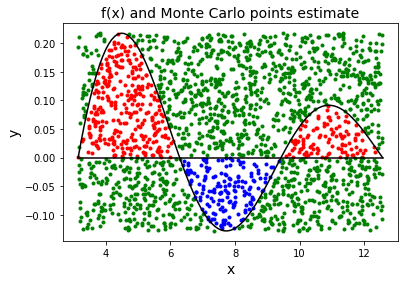

The thinking behind this is as follows:
The green dots do not contribute to the integral. The red dots are positive contributions and the blue dots are negative contributions to the area.
Thus our estimate for the integral will be: (number of red dots - number of blue dots)/number of red+blue+green dots * area of rectangle [pi,4pi]x[min_y,max_y]


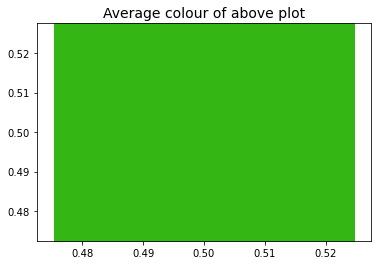

In [4]:
# define true function
def my_fun(x):
    Y=-np.sin(x)/x

    return Y

# Use Monte Carlo sampling to determine integral
# set the interval [a,b] and the number of samples
N = 2000
a, b = np.pi, 4*np.pi

x = np.random.uniform(a, b, N)
y = np.random.uniform(np.min(my_fun(x)),np.max(my_fun(x)), N)

total_pos=0
total_neg=0
total_out=0
for i in range(N):
    if y[i]<=my_fun(x[i]) and y[i]>=0: #these points are positive contributions to the integral
        total_pos+=1
        plt.plot(x[i],y[i],'r.')
        
    elif y[i]>=my_fun(x[i]) and y[i]<=0: #these points are negative contributions to the integral
        total_neg+=1
        plt.plot(x[i],y[i],'b.')

    else: #these points do not contribute to the integral
        total_out+=1
        plt.plot(x[i],y[i],'g.')

# obtain the area
rectangle_area = (b-a)*(np.max(my_fun(x))- np.min(my_fun(x)))
region_area = rectangle_area * (total_pos-total_neg)/N
print("The estimate for the signed area of the region is", region_area)

# plot f(x)=-sinx/x
x_plot = np.linspace(a, b, 101)
y_plot = my_fun(x_plot)
plt.plot(x_plot ,y_plot, 'k')

# plot line y=0
x1 = np.linspace(a, b, 101)
y1 = 0*x1
plt.plot(x1,y1, 'k')

#adding labels and title
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.title("f(x) and Monte Carlo points estimate", fontsize=14)

plt.show()
print("The thinking behind this is as follows:")
print("The green dots do not contribute to the integral. The red dots are positive contributions and the blue dots are negative contributions to the area.")
print("Thus our estimate for the integral will be: (number of red dots - number of blue dots)/number of red+blue+green dots * area of rectangle [pi,4pi]x[min_y,max_y]")

#plot average colour, using the number of dots to find RGB value
plt.plot(0.5, 0.5, 's', markersize=300, color = ((total_pos)/2000,total_out/2000,total_neg/2000))
plt.title("Average colour of above plot", fontsize=14)
plt.show()